Slope: 5.07793064344
Score: 0.878262470366


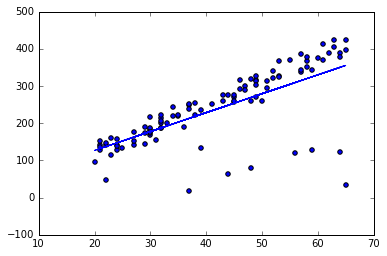

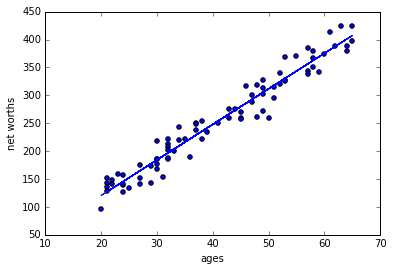

In [37]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

print "Slope: " + str(reg.coef_[0][0])
print "Score: " + str(reg.score(ages_test, net_worths_test))



def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    errors = (net_worths-predictions)**2
    cleaned_data =zip(ages,net_worths,errors)
    cleaned_data = sorted(cleaned_data,key=lambda x:x[2][0], reverse=True)
    limit = int(len(net_worths)*0.1)
    
    
    return cleaned_data[limit:]


%matplotlib inline

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    cleaned_data = outlierCleaner(reg.predict(ages_train), ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"



In [30]:
# %load outlier_cleaner.py
#!/usr/bin/python


def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    errors = (net_worths-predictions)**2
    cleaned_data =zip(ages,net_worths,errors)
    cleaned_data = sorted(cleaned_data,key=lambda x:x[2][0], reverse=True)
    limit = int(len(net_worths)*0.1)
    
    
    return cleaned_data[limit:]
    





In [32]:
len(outlierCleaner(reg.predict(ages_train), ages_train, net_worths_train ))

81

In [39]:
#slope after clean
ages_clean = numpy.array([e[0] for e in cleaned_data])  
net_worths_clean = numpy.array([e[1] for e in cleaned_data])


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_clean, net_worths_clean)

print "Slope: " + str(reg.coef_[0][0])
print "Score: " + str(reg.score(ages_test, net_worths_test))


Slope: 6.36859480694
Score: 0.983189455396


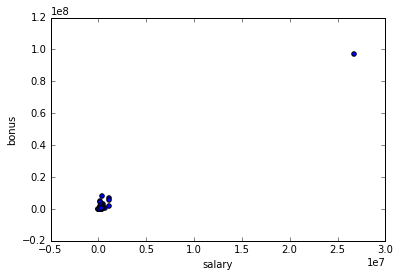

In [65]:
# %load enron_outliers.py
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()




In [46]:
len(data)

95

In [61]:
# see the data to find the outlier
import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

In [48]:
# keys of dictionary
enron_data['SKILLING JEFFREY K'].keys()

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

In [49]:
# find max salary
salary_list = []
for entry in enron_data:
    if type (enron_data[entry]['salary']) == int :
        salary_list.append(enron_data[entry]['salary'])
print sorted(salary_list)

[477, 6615, 63744, 76399, 80818, 85274, 94941, 96840, 130724, 158403, 162779, 170941, 174246, 182245, 184899, 187922, 192008, 197091, 199157, 201955, 206121, 210500, 210692, 211788, 211844, 213625, 213999, 216582, 221003, 222093, 224305, 229284, 231330, 231946, 236457, 239502, 239671, 240189, 243293, 247338, 248017, 248146, 248546, 249201, 250100, 251654, 257486, 259996, 261516, 261809, 261879, 262663, 262788, 263413, 265214, 267093, 267102, 269076, 271442, 272880, 273746, 274975, 275101, 278601, 278601, 288542, 288558, 288589, 304110, 304588, 309946, 314288, 317543, 329078, 330546, 339288, 349487, 357091, 365038, 365163, 365788, 370448, 374125, 404338, 415189, 420636, 428780, 440698, 492375, 510364, 655037, 1060932, 1072321, 1111258, 26704229]


In [50]:
# find person with max salary
for entry in enron_data:
    if enron_data[entry]['salary'] == 26704229:
        print entry

TOTAL


Outlier is the 'TOTAL'. Let's remove it

In [94]:
enron_data.pop('TOTAL',0)

0

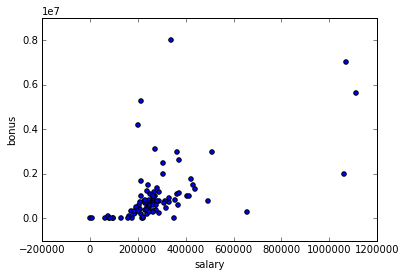

In [71]:
features = ["salary", "bonus"]
data = featureFormat(enron_data, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. What are the names associated with those points?

In [84]:
# catch  them
for entry in enron_data:
    if type (enron_data[entry]['bonus']) == int and type (enron_data[entry]['salary']) == int:
        if enron_data[entry]['bonus']>= 5000000 and enron_data[entry]['salary'] >= 1000000:
            print entry

LAY KENNETH L
SKILLING JEFFREY K


In [96]:
# different way of catch outliers
from pprint import pprint
outliers_salary = []
for key in enron_data:
    val = enron_data[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key,int(val)))

pprint(sorted(outliers,key=lambda x:x[1],reverse=True)[:2])



[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]
